
#Submitted by:
##1. Yagna Srinivasa Harsha Annadata(yxa210024)
##2. Vishruth Reddy Chinthi Reddy(vxc220020)

########## NULL Values in dataset ###########
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


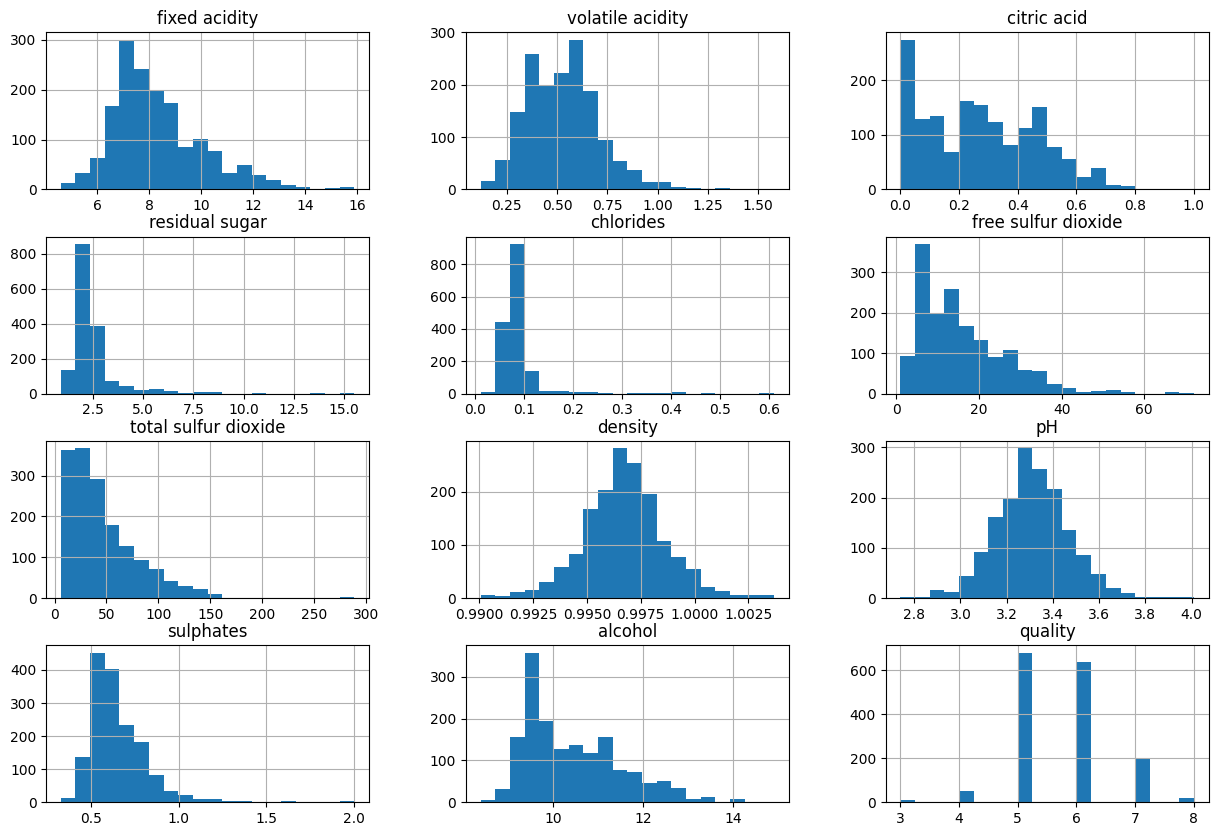

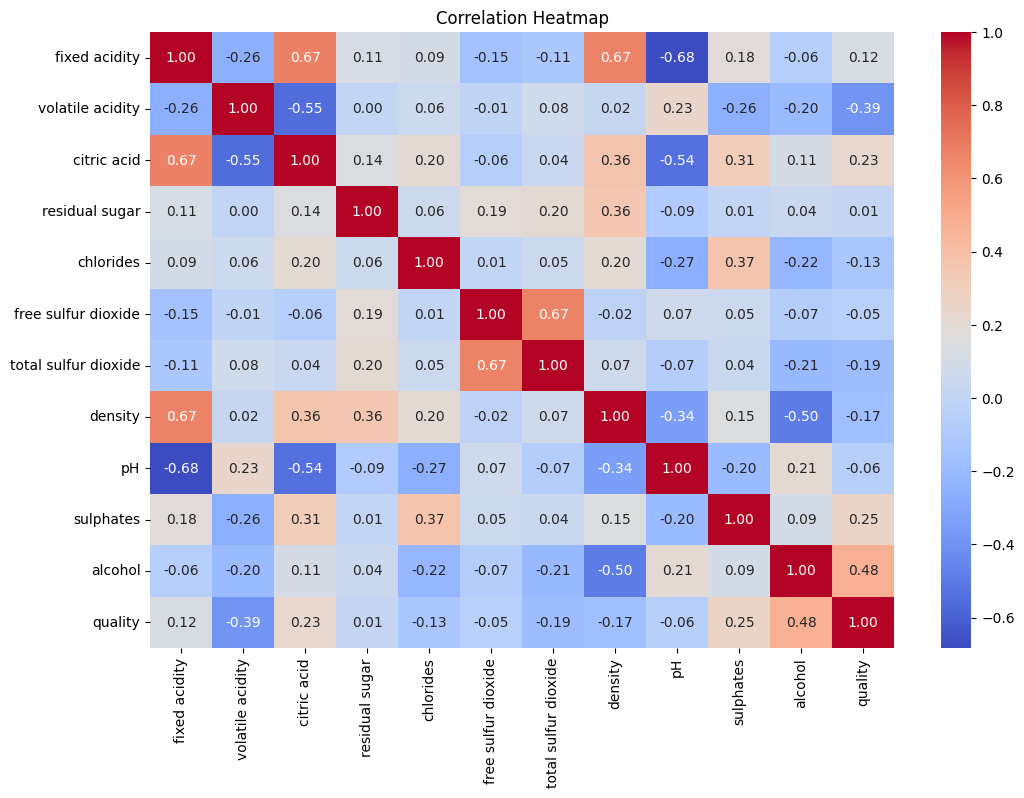

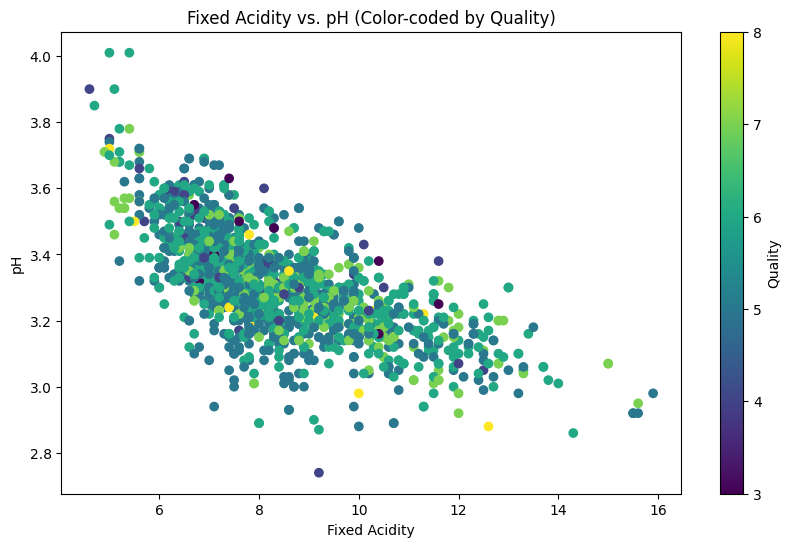

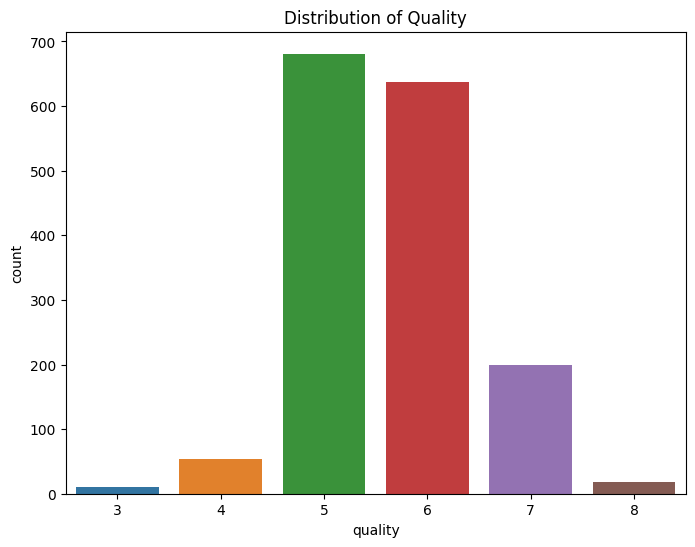

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import csv
from io import StringIO
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset from GitHub
path="https://raw.githubusercontent.com/YagnaAnnadata/Projects/main/LinearRegression/Dataset/winequality/winequality-red.csv"

response = requests.get(path)
data = StringIO(response.text)
data1 = pd.read_csv(data, delimiter=';')
print("########## NULL Values in dataset ###########")
print(data1.isna().sum())

# Plot of histograms for each feature
data1.hist(bins=20, figsize=(15, 10))
plt.show()

# Calculate the correlation matrix
corr_matrix = data1.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(data1['fixed acidity'], data1['pH'], c=data1['quality'], cmap='viridis')
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.title('Fixed Acidity vs. pH (Color-coded by Quality)')
plt.colorbar(label='Quality')
plt.show()
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=data1)
plt.title("Distribution of Quality")
plt.show()



Training with epochs=1000 and learning_rate=0.001
Activation Function: Sigmoid
Train Accuracy: 0.4600, Test Accuracy: 0.5000

Activation Function: Tanh
Train Accuracy: 0.5800, Test Accuracy: 0.5500

Activation Function: ReLU
Train Accuracy: 0.5600, Test Accuracy: 0.5500

Training with epochs=1000 and learning_rate=0.01
Activation Function: Sigmoid
Train Accuracy: 0.4600, Test Accuracy: 0.5000

Activation Function: Tanh
Train Accuracy: 0.5400, Test Accuracy: 0.5000

Activation Function: ReLU
Train Accuracy: 0.5400, Test Accuracy: 0.5000

Training with epochs=1000 and learning_rate=0.1
Activation Function: Sigmoid
Train Accuracy: 0.5500, Test Accuracy: 0.5000

Activation Function: Tanh
Train Accuracy: 0.4600, Test Accuracy: 0.5000

Activation Function: ReLU
Train Accuracy: 0.5400, Test Accuracy: 0.5000

Training with epochs=5000 and learning_rate=0.001
Activation Function: Sigmoid
Train Accuracy: 0.4600, Test Accuracy: 0.5000

Activation Function: Tanh
Train Accuracy: 0.5400, Test Accura

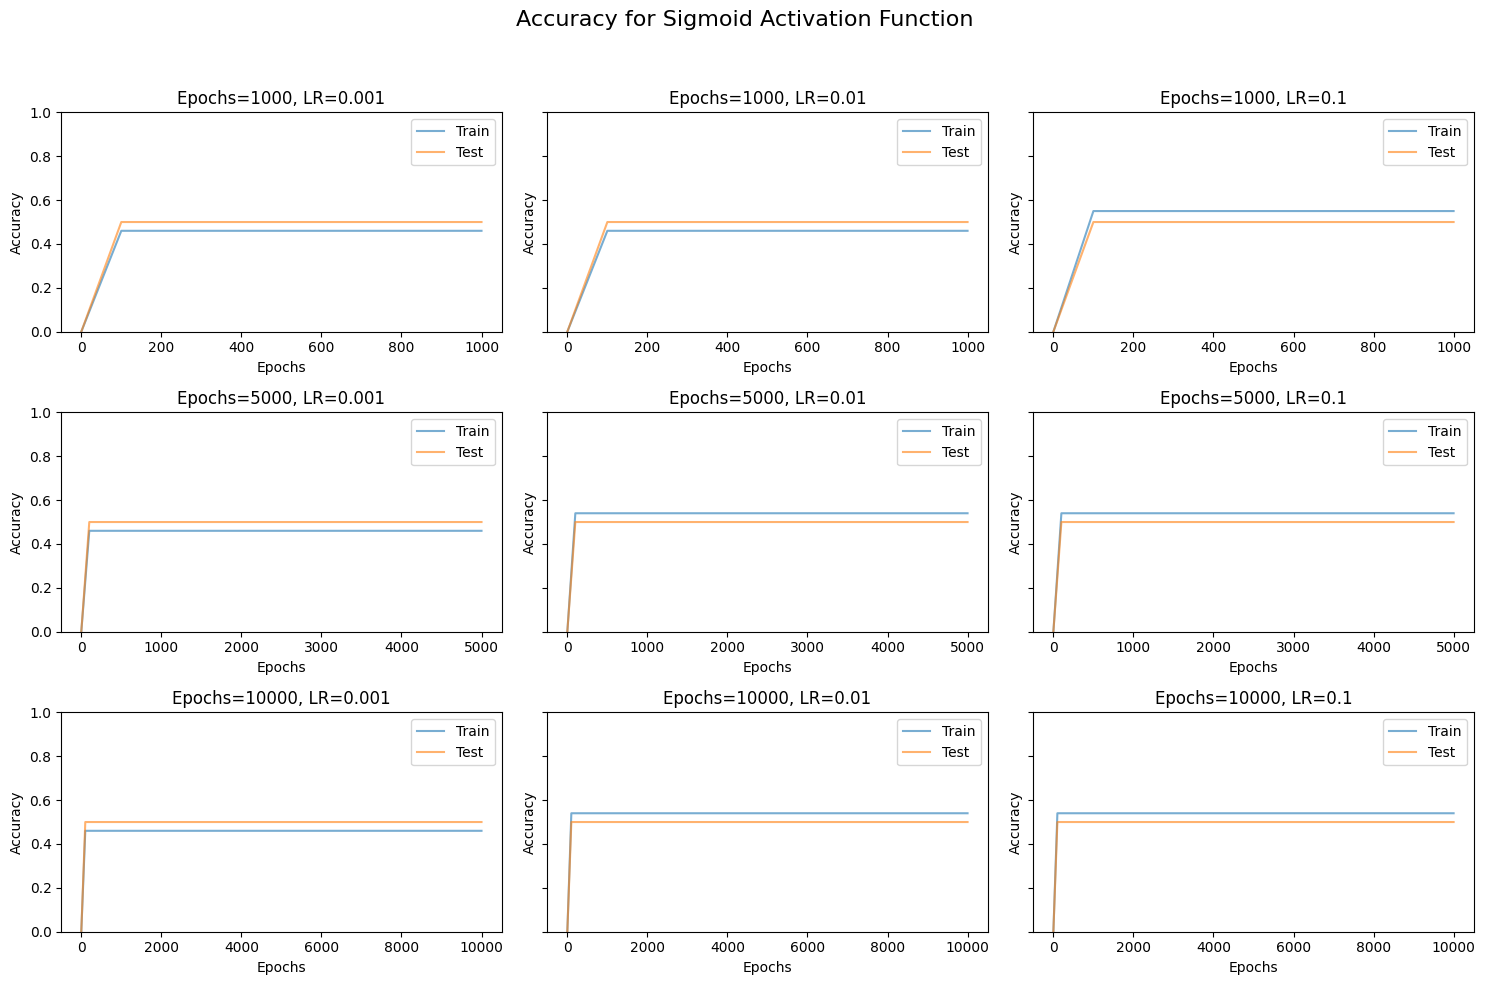

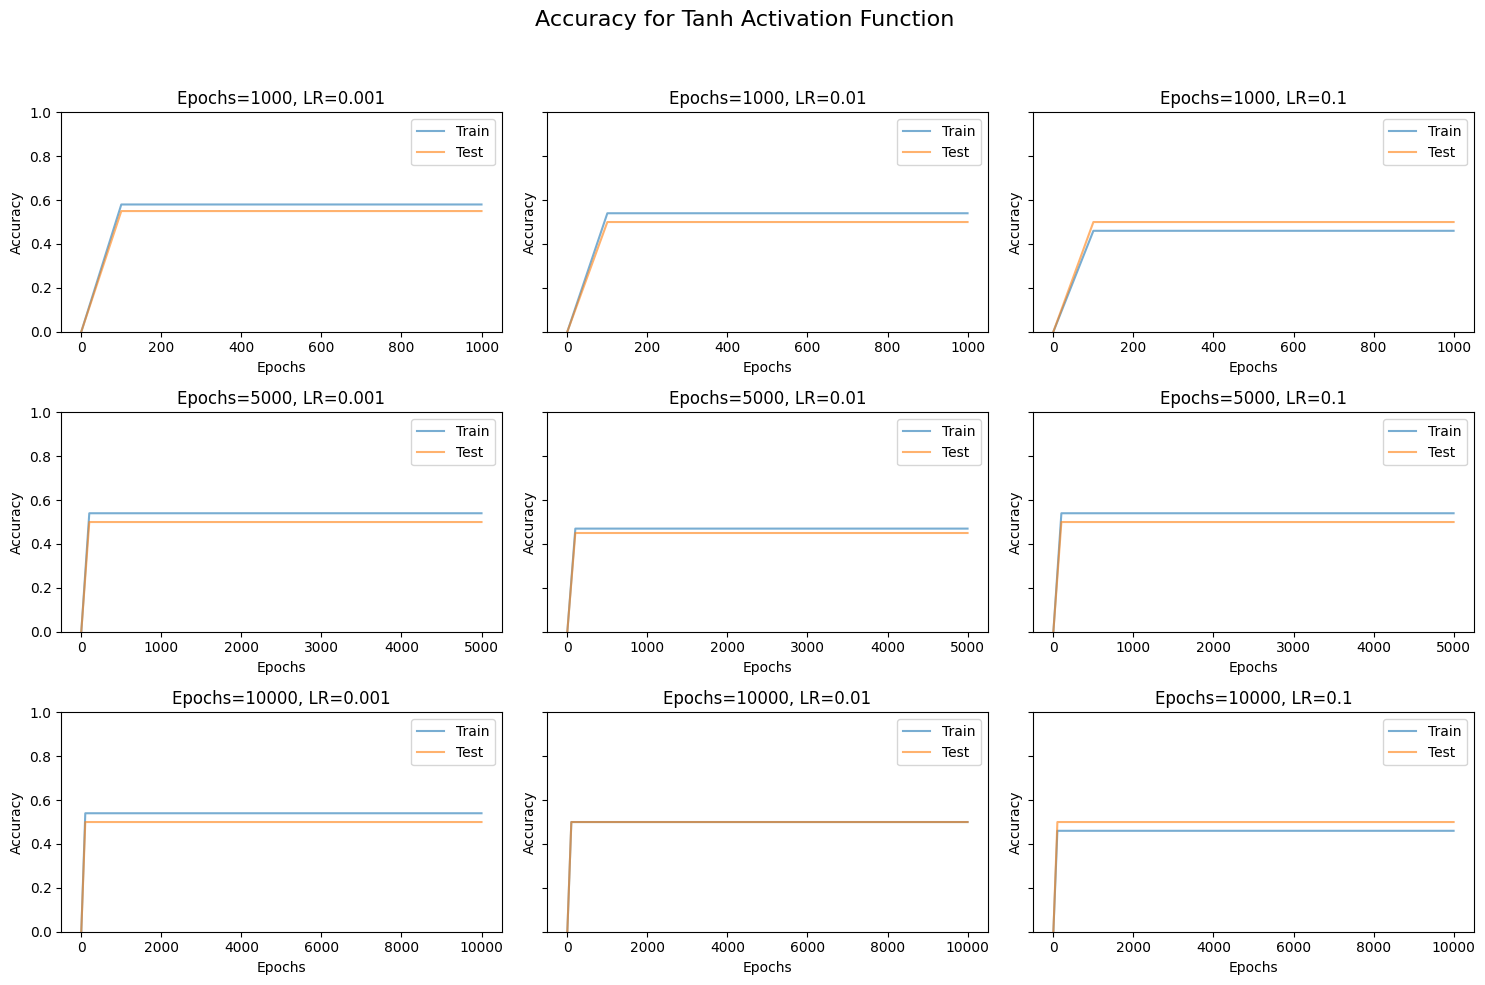

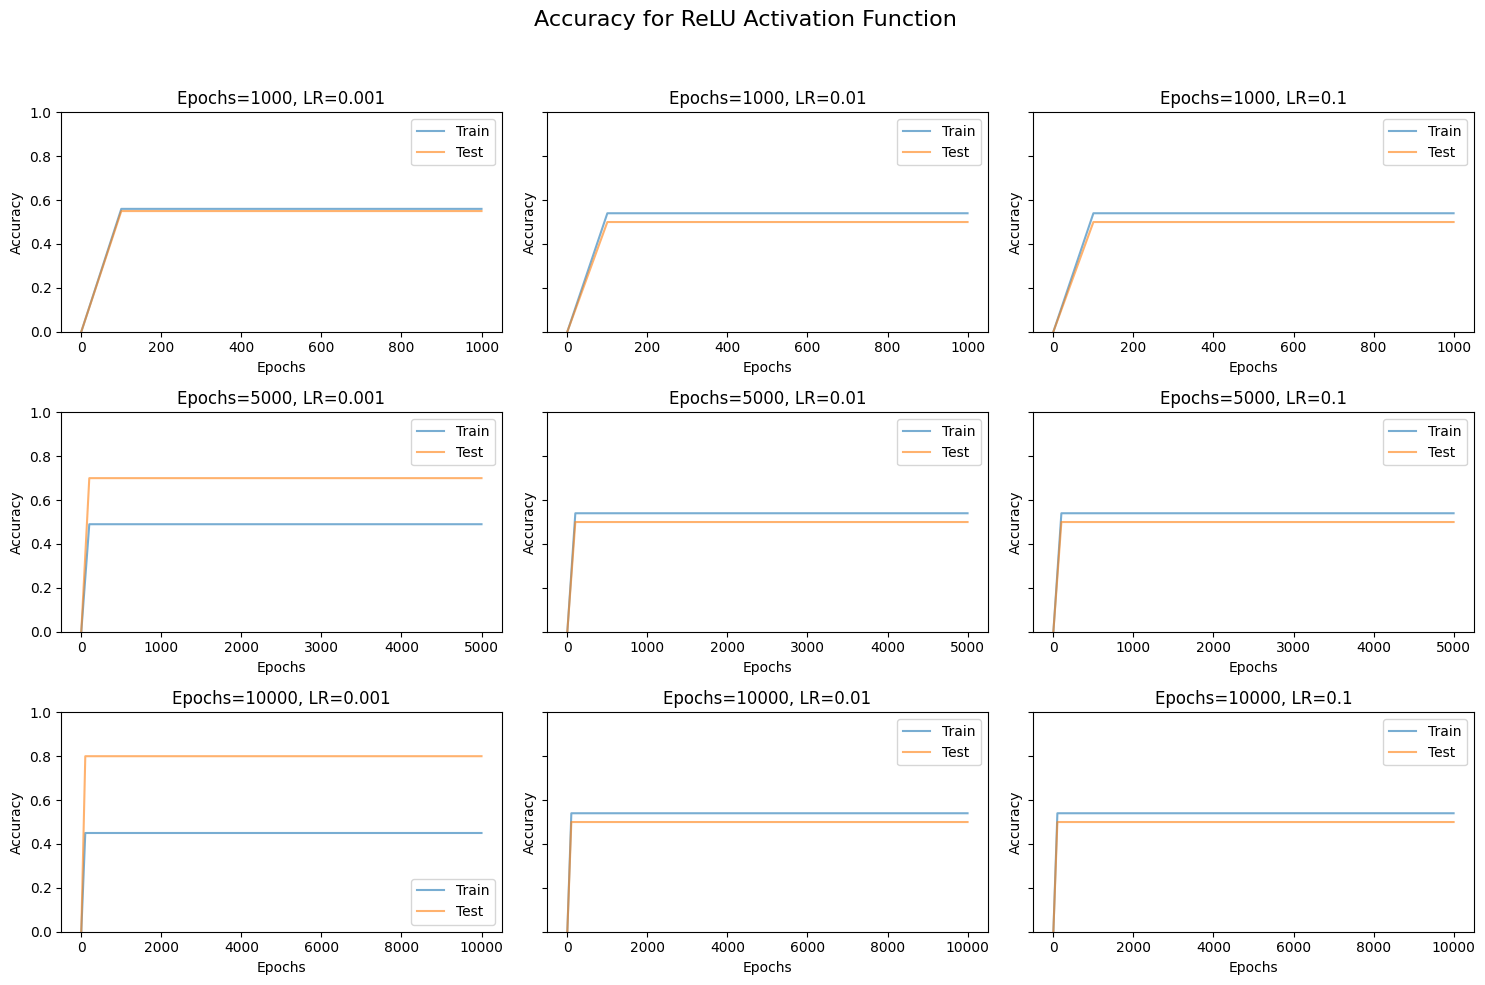

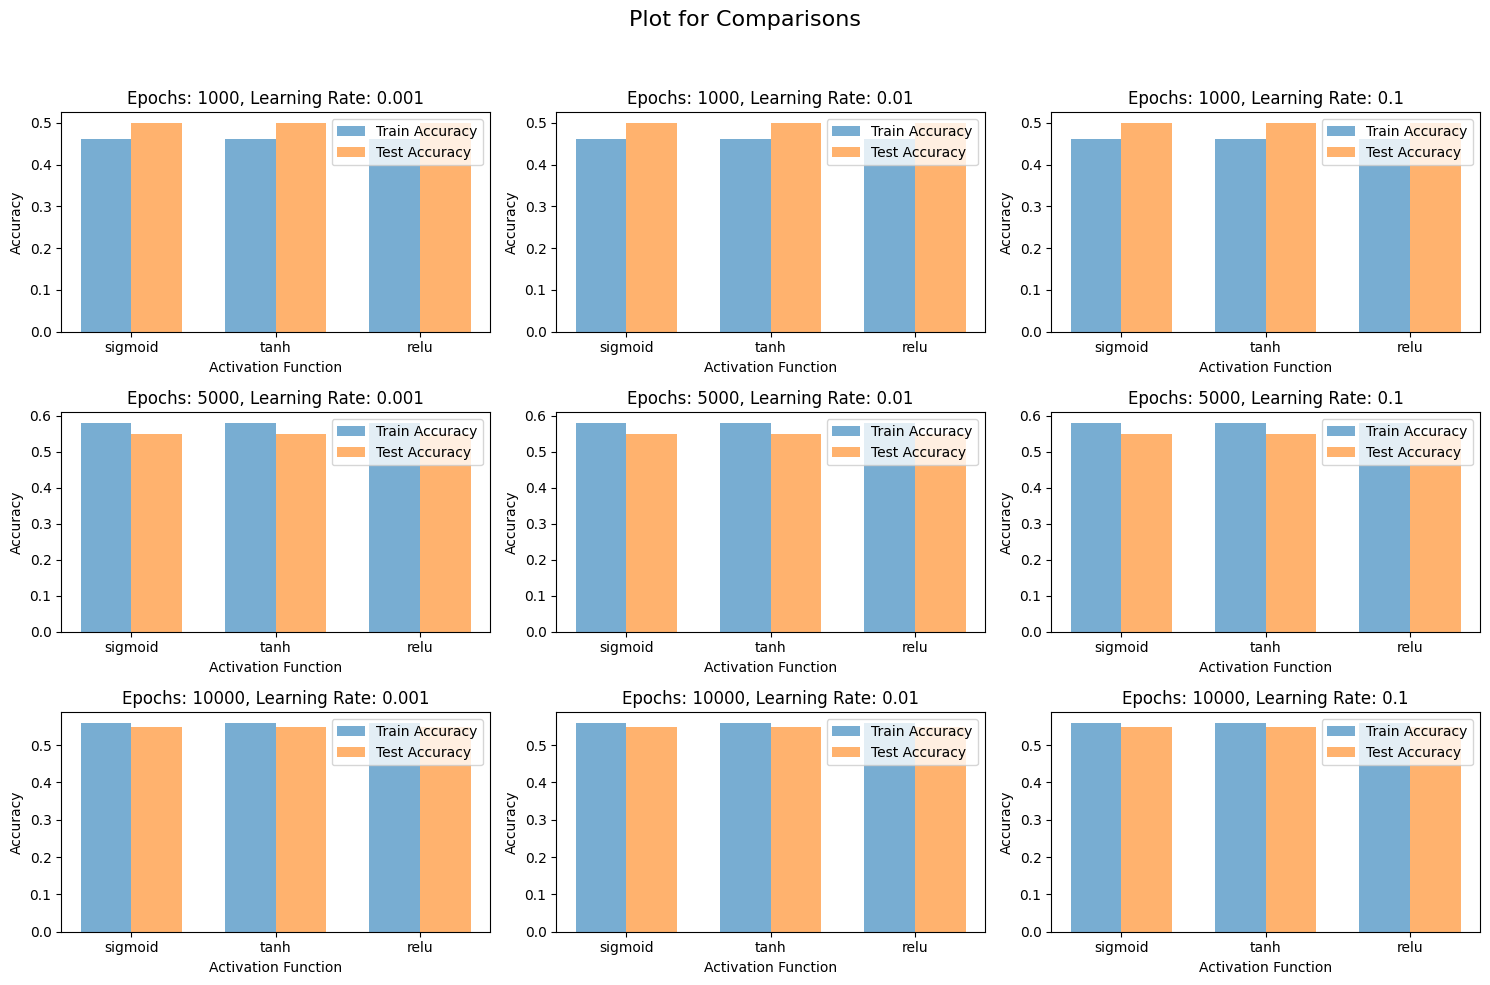

In [ ]:
class NeuralNet:
    def __init__(self, datafile):
        self.datafile = datafile
        self.processed_data = None  # Initialize processed_data attribute

#defining sigmoid function and its derivative
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(x):
        return x * (1 - x)

#defining tanh function and its derivative
    def tanh(x):
        return np.tanh(x)


    def tanh_derivative(x):
        return 1 - np.tanh(x) ** 2

#defining relu function and its derivative
    def relu(x):
        return np.maximum(0, x)


    def relu_derivative(x):
        return np.where(x > 0, 1, 0)

#preprocessing the data
    def preprocess_data(self):
        data = pd.read_csv(self.datafile)  # Use self.datafile
        # Handle missing values
        data.fillna(data.mean(), inplace=True)
        # One hot encoding for the 'Wine Quality' attribute
        dummies = pd.get_dummies(data['Wine Quality'])
        self.processed_data = pd.concat([data, dummies], axis=1)
        self.processed_data.drop(columns=['Wine Quality'], inplace=True)

#splitting the dataset
    def split_data(X, y, test_size, optimizer='gradient_descent'):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        return X_train, X_test, y_train, y_test


    def initialize_params(input_layer, hidden_layer, output_layer):
        weights_input_hidden = np.random.uniform(size=(input_layer, hidden_layer))
        bias_hidden = np.zeros((1, hidden_layer))
        weights_hidden_output = np.random.uniform(size=(hidden_layer, output_layer))
        bias_output = np.zeros((1, output_layer))
        return weights_input_hidden, bias_hidden, weights_hidden_output, bias_output

#forward propagation
    def forward_propagate(X, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output, activation):
        hidden_net = np.dot(X, weights_input_hidden) + bias_hidden
        hidden_output = activation(hidden_net)
        output_net = np.dot(hidden_output, weights_hidden_output) + bias_output
        output = activation(output_net)
        return hidden_net, hidden_output, output_net, output

#back propagation
    def backpropagate(X, y, hidden_output, output, weights_hidden_output, activation_derivative, learning_rate, weights_input_hidden):
        error = y - output
        output_back = error * activation_derivative(output)
        error_hidden = output_back.dot(weights_hidden_output.T)
        hidden_back = error_hidden * activation_derivative(hidden_output)

#optimizer
        weights_hidden_output += hidden_output.T.dot(output_back) * learning_rate
        weights_input_hidden += X.T.dot(hidden_back) * learning_rate

        return weights_hidden_output, weights_input_hidden

#training the dataset
    @staticmethod
    def train(X, y, activation, activation_derivative, epochs, learning_rate ):
        input_layer, hidden_layer, output_layer = X.shape[1], 4, y.shape[1]
        weights_input_hidden, bias_hidden, weights_hidden_output, bias_output = NeuralNet.initialize_params(input_layer, hidden_layer, output_layer)

        for epochs in epochs_list:
          for act in range(len(activation)):
                hidden_net, hidden_output, output_net, output = NeuralNet.forward_propagate(
                    X, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output, activation[act])
                weights_hidden_output, weights_input_hidden = NeuralNet.backpropagate(
                    X, y, hidden_output, output, weights_hidden_output, activation_derivative[act], learning_rate, weights_input_hidden)

        return weights_hidden_output, weights_input_hidden

#prediction of the model
    @staticmethod
    def predict(X, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output, activation):
        hidden_net, hidden_output, output_net, output = NeuralNet.forward_propagate(
            X, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output, activation)
        return (output > 0.5).astype(int)

#defining the learning rate and epoch size
epochs_list = [1000, 5000, 10000]
learning_rates = [0.001, 0.01, 0.1]

np.random.seed(0)
X_train = np.random.rand(100, 5)
y_train = np.random.randint(0, 2, size=(100, 1))

np.random.seed(1)
X_test = np.random.rand(20, 5)
y_test = np.random.randint(0, 2, size=(20, 1))

# Define activation functions and their derivatives
activation_functions = [NeuralNet.sigmoid, NeuralNet.tanh, NeuralNet.relu]
activation_derivatives = [NeuralNet.sigmoid_derivative, NeuralNet.tanh_derivative, NeuralNet.relu_derivative]
activation_names = ['Sigmoid', 'Tanh', 'ReLU']

train_accuracies = []
test_accuracies = []

for epochs in epochs_list:
    for learning_rate in learning_rates:
        print(f"Training with epochs=\033[1m{epochs}\033[0m and learning_rate=\033[1m{learning_rate}\033[0m")

        nn = NeuralNet(datafile='https://raw.githubusercontent.com/YagnaAnnadata/Projects/main/LinearRegression/Dataset/winequality/winequality-red.csv')

        weights_hidden_output, weights_input_hidden = nn.train(X_train, y_train, activation_functions, activation_derivatives, epochs=epochs, learning_rate=learning_rate)
        for act in range(len(activation_functions)):
            train_accuracy_list = []
            test_accuracy_list = []

            for epoch in range(epochs):
                if (epoch + 1) % 100 == 0:  # Adjust the frequency based on your preference
                    train_predictions = nn.predict(X_train, weights_input_hidden, np.zeros((1, 4)), weights_hidden_output, np.zeros((1, 1)), activation_functions[act])
                    test_predictions = nn.predict(X_test, weights_input_hidden, np.zeros((1, 4)), weights_hidden_output, np.zeros((1, 1)), activation_functions[act])

                    train_accuracy = accuracy_score(y_train, train_predictions)
                    test_accuracy = accuracy_score(y_test, test_predictions)

                    train_accuracy_list.append(train_accuracy)
                    test_accuracy_list.append(test_accuracy)


            print(f"Activation Function: \033[1m{activation_names[act]}\033[0m")
            print(f"Train Accuracy: \033[1m{train_accuracy:.4f}\033[0m, Test Accuracy: \033[1m{test_accuracy:.4f}\033[0m\n")
            train_accuracies.append(train_accuracy_list)
            test_accuracies.append(test_accuracy_list)

# Plotting train and test accuracies against epochs
for act in range(len(activation_functions)):
    fig, axs = plt.subplots(len(epochs_list), len(learning_rates), figsize=(15, 10), sharey=True)

    for i in range(len(epochs_list)):
        for j in range(len(learning_rates)):
            train_data = train_accuracies[i*len(learning_rates)*len(activation_functions) + j*len(activation_functions) + act]
            test_data = test_accuracies[i*len(learning_rates)*len(activation_functions) + j*len(activation_functions) + act]

            ax = axs[i, j]
            ax.plot(range(0, epochs_list[i]+1, 100), [0]+train_data, label='Train', alpha=0.6)  # Adjust the x-axis values based on your epoch increments
            ax.plot(range(0, epochs_list[i]+1, 100), [0]+test_data, label='Test', alpha=0.6)  # Adjust the x-axis values based on your epoch increments
            ax.set_title(f'Epochs={epochs_list[i]}, LR={learning_rates[j]}')
            ax.set_xlabel('Epochs')
            ax.set_ylabel('Accuracy')
            ax.set_ylim(0, 1)
            ax.legend()

    fig.suptitle(f'Accuracy for {activation_names[act]} Activation Function', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#plot for comparisons
fig, axs = plt.subplots(len(epochs_list), len(learning_rates), figsize=(15, 10))
for i in range(len(epochs_list)):
    for j in range(len(learning_rates)):
        train_data = [train_accuracies[i][j] for _ in activation_functions]
        test_data = [test_accuracies[i][j] for _ in activation_functions]
        activation_names = [func.__name__ for func in activation_functions]

        x = np.arange(len(activation_names))  # the label locations
        width = 0.35  # the width of the bars

        axs[i, j].bar(x - width/2, train_data, width, label='Train Accuracy', alpha=0.6)
        axs[i, j].bar(x + width/2, test_data, width, label='Test Accuracy', alpha=0.6)
        axs[i, j].set_title(f'Epochs: {epochs_list[i]}, Learning Rate: {learning_rates[j]}')
        axs[i, j].set_xlabel('Activation Function')
        axs[i, j].set_ylabel('Accuracy')
        axs[i, j].set_xticks(x)
        axs[i, j].set_xticklabels(activation_names)
        axs[i, j].legend()
fig.suptitle(f'Plot for Comparisons',fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



